In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.dates as mdates
import numpy as np

### read_datesets()

In [4]:
def read_dataset(folder, file, date_col=None):
    '''
    folder: is a Path object
    file: the CSV filename in that Path object. 
    date_col: specify a date_col to use as index_col 
    
    returns: a pandas DataFrame with a DatetimeIndex
    '''
    df = pd.read_csv(folder / file, 
                     index_col=date_col, 
                     parse_dates=[date_col])
    return df


### plot_dfs()

In [5]:
def plot_dfs(df1, df2, col, title=None, xlabel=None, ylabel=None):
    '''	
    df1: original dataframe without missing data
    df2: dataframe with missing data
    col: column name that contains missing data
    '''    
    df_missing = df2.rename(columns={col: 'missing'})
    
    columns = df_missing.loc[:, 'missing':].columns.tolist()
    subplots_size = len(columns)
    
    # subplots_size = df2.shape[1]
    fig, ax = plt.subplots(subplots_size+1, 1, sharex=True)
    plt.subplots_adjust(hspace=0.25)
    fig.suptitle = title 
    
    df1[col].plot(ax=ax[0], figsize=(10, 16))
    ax[0].set_title('Original Dataset')
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel(ylabel)    
    
    for i, colname in enumerate(columns):
        df_missing[colname].plot(ax=ax[i+1])
        ax[i+1].set_title(colname)

    plt.show()


### rmse_score()

In [6]:
def rmse_score(df1, df2, col=None):
    '''
    df1: original dataframe without missing data
    df2: dataframe with missing data
    col: column name that contains missing data

    returns: a list of scores
    '''
    df_missing = df2.rename(columns={col: 'missing'})
    columns = df_missing.loc[:, 'missing':].columns.tolist()
    scores = []
    for comp_col in columns[1:]:
        rmse = np.sqrt(np.mean((df1[col] - df_missing[comp_col])**2))
        scores.append(rmse)
        print(f'RMSE for {comp_col}: {rmse}')
    return scores


# Perform Data Quality Checks

In [135]:
co2 = Path('../../datasets/Ch7/co2_missing.csv')
ecom = Path('../../datasets/Ch7/clicks_missing_multiple.csv')
co2_df = pd.read_csv(co2)
ecom_df = pd.read_csv(ecom, parse_dates=['date'])

In [111]:
co2_df.shape

(226, 2)

In [112]:
ecom_df.head()

,date,price,location,clicks
0,2008-04-01,43.155647,2.0,18784
1,2008-04-02,43.079056,1.0,24738
2,NaT,43.842609,NaN,15209
3,NaT,NaN,1.0,14018
4,NaT,43.941176,1.0,11974


In [113]:
co2_df.head()

,year,co2
0,1750,0.0125
1,1760,0.0128
2,1770,0.0150
3,1780,0.0169
4,1790,0.0206


In [114]:
co2_df.isnull().sum()

year     0
co2     25
dtype: int64

In [115]:
# using isna()
co2_df.isna().sum()

year     0
co2     25
dtype: int64

In [116]:
ecom_df.isna().sum()

date         4
price        1
location     1
clicks      14
dtype: int64

In [117]:
# using isnull()
ecom_df.isnull().sum()

date         4
price        1
location     1
clicks      14
dtype: int64

In [118]:
# using isnull()
ecom_df.isnull().sum().sum()

20

In [119]:
co2_df[190:195]

,year,co2
190,1985,NaN
191,1986,NaN
192,1987,NaN
193,1988,4.2953
194,1989,4.2782


In [120]:
ecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      131 non-null    datetime64[ns]
 1   price     134 non-null    float64       
 2   location  134 non-null    float64       
 3   clicks    121 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 4.3+ KB


In [121]:
ecom_df.isnull().values.any()

True

In [122]:
co2_df.isnull().values.any()

True

In [123]:
ecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      131 non-null    datetime64[ns]
 1   price     134 non-null    float64       
 2   location  134 non-null    float64       
 3   clicks    121 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 4.3+ KB


In [124]:
co2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    226 non-null    int64  
 1   co2     201 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.7 KB


In [125]:
co2_df.describe(include='all', 
                datetime_is_numeric=True)

,year,co2
count,226.000000,201.000000
mean,1906.902655,1.590015
std,66.543281,1.644182
min,1750.000000,0.000000
25%,1851.250000,0.076400
50%,1907.500000,0.935100
75%,1963.750000,2.807600
max,2020.000000,4.907900


In [126]:
ecom_df.describe(include='all', 
                 datetime_is_numeric=True)

,date,price,location,clicks
count,131,134.000000,134.000000,121
unique,NaN,NaN,NaN,119
top,NaN,NaN,NaN,?
freq,NaN,NaN,NaN,2
mean,2008-06-08 22:32:03.664122112,43.480221,1.694030,NaN
min,2008-04-01 00:00:00,42.207018,1.000000,NaN
25%,2008-05-07 12:00:00,43.038050,1.000000,NaN
50%,2008-06-09 00:00:00,43.498842,1.000000,NaN
75%,2008-07-11 12:00:00,43.889935,2.000000,NaN
max,2008-08-13 00:00:00,45.801613,5.000000,NaN


In [127]:
test = pd.read_csv(ecom, parse_dates=['date'], na_values={'?'})

In [128]:
ecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      131 non-null    datetime64[ns]
 1   price     134 non-null    float64       
 2   location  134 non-null    float64       
 3   clicks    121 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 4.3+ KB


In [129]:
co2_df.replace(0, np.NaN, inplace=True)
ecom_df.replace('?', np.NaN, inplace=True)
ecom_df['clicks'] = ecom_df['clicks'].astype('float')

In [130]:
co2_df.isnull().sum()

year     0
co2     35
dtype: int64

In [131]:
ecom_df.isnull().sum()

date         4
price        1
location     1
clicks      16
dtype: int64

## How it works

In [138]:
co2_df = pd.read_csv(co2, keep_default_na=False)

In [153]:
len('')

0

In [148]:
co2_df.iloc[132:139]['co2'] == ''

132    True
133    True
134    True
135    True
136    True
137    True
138    True
Name: co2, dtype: bool

In [ ]:
co2_df.isna().sum()

year    0
co2     0
dtype: int64

In [34]:
co2_df.shape

(226, 2)

In [35]:
co2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    226 non-null    int64 
 1   co2     226 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.7+ KB


In [36]:
co2_df[190:195]

,year,co2
190,1985,NA
191,1986,N/A
192,1987,null
193,1988,4.2953
194,1989,4.2782


In [37]:
co2_df.isnull().sum()
co2_df.isnull().sum().sum()

0

### There is More

In [38]:
pd.read_csv(ecom, parse_dates=['date'], na_values={'?'})

,date,price,location,clicks
0,2008-04-01,43.155647,2.0,18784.0
1,2008-04-02,43.079056,1.0,24738.0
2,NaT,43.842609,NaN,15209.0
3,NaT,NaN,1.0,14018.0
4,NaT,43.941176,1.0,11974.0
...,...,...,...,...
130,2008-08-09,44.182033,1.0,6716.0
131,2008-08-10,43.608260,1.0,9523.0
132,2008-08-11,43.553363,1.0,8881.0
133,2008-08-12,44.500469,1.0,7272.0


In [39]:
pd.read_csv(ecom, parse_dates=['date'], na_values={'?'}).isna().sum()

date         4
price        1
location     1
clicks      16
dtype: int64

# Handling Missing Data with Univariate Imputation using pandas

In [40]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [41]:
folder = Path('../../datasets/Ch7/')

co2_original = read_dataset(folder, 'co2_original.csv', 'year')
co2_missing = read_dataset(folder, 'co2_missing_only.csv', 'year')
clicks_original = read_dataset(folder, 'clicks_original.csv', 'date')
clicks_missing = read_dataset(folder, 'clicks_missing.csv', 'date')


In [42]:
co2_missing.isnull().sum()

co2    35
dtype: int64

In [43]:
clicks_missing.isnull().sum()

price        0
location     0
clicks      16
dtype: int64

In [44]:
clicks_missing.loc[:, 'missing':].shape[1]

2

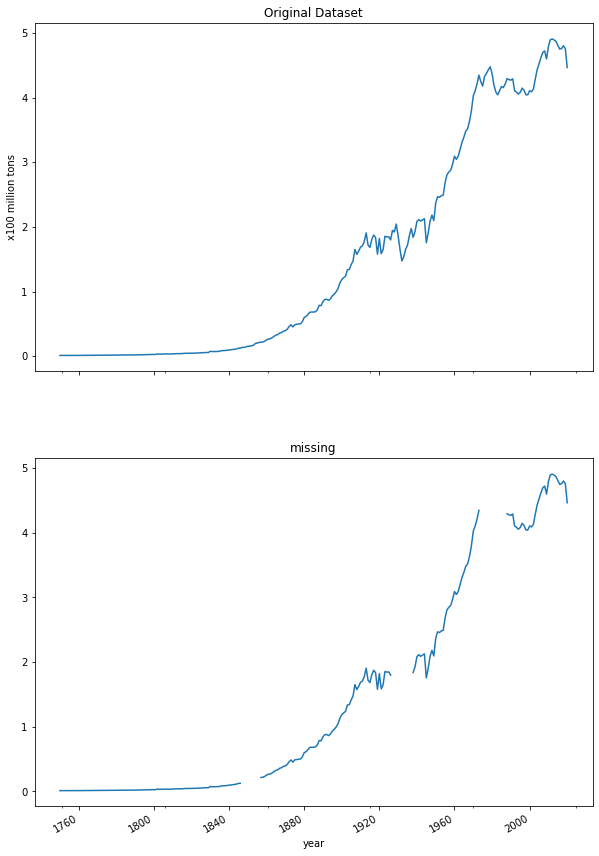

In [45]:
plot_dfs(co2_original, 
         co2_missing, 
         'co2',
         title="Annual CO2 Emission per Capita",
         xlabel="Years",
         ylabel="x100 million tons")

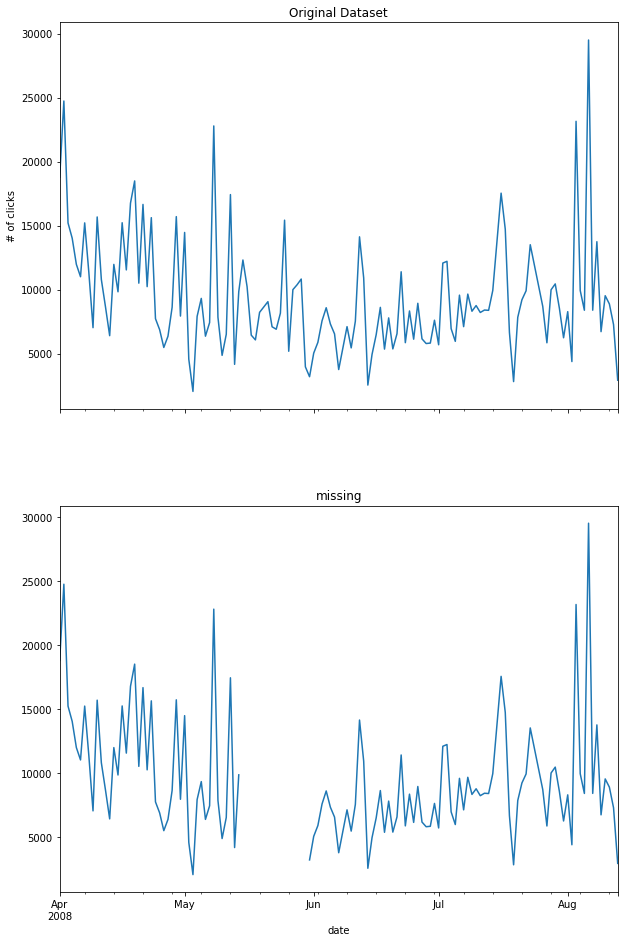

In [46]:
plot_dfs(clicks_original, 
         clicks_missing, 
         'clicks',
         title="Page Clicks per Day",
         xlabel="date",
         ylabel="# of clicks")

In [47]:
co2_missing['ffill'] = co2_missing['co2'].fillna(method='ffill')
co2_missing['bfill'] = co2_missing['co2'].fillna(method='bfill')
co2_missing['mean'] = co2_missing['co2'].fillna(co2_missing['co2'].mean())

In [48]:
_ = rmse_score(co2_original, 
                    co2_missing, 
                    'co2')

RMSE for ffill: 0.05873012599267133
RMSE for bfill: 0.05550012995280968
RMSE for mean: 0.7156383637041684


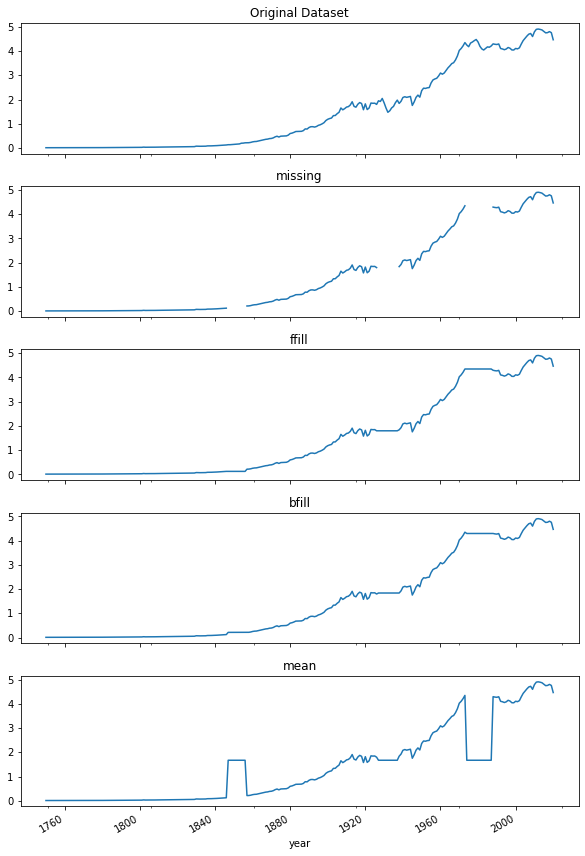

In [49]:
plot_dfs(co2_original, co2_missing, 'co2')

In [50]:
clicks_missing['ffil'] = clicks_missing['clicks'].fillna(method='ffill')
clicks_missing['bfill'] = clicks_missing['clicks'].fillna(method='bfill')
clicks_missing['mean'] = clicks_missing['clicks'].fillna(clicks_missing['clicks'].mean())

In [51]:
_ = rmse_score(clicks_original, 
                    clicks_missing, 
                    'clicks')

RMSE for ffil: 1034.1210689204554
RMSE for bfill: 2116.6840489225033
RMSE for mean: 997.7600138929953


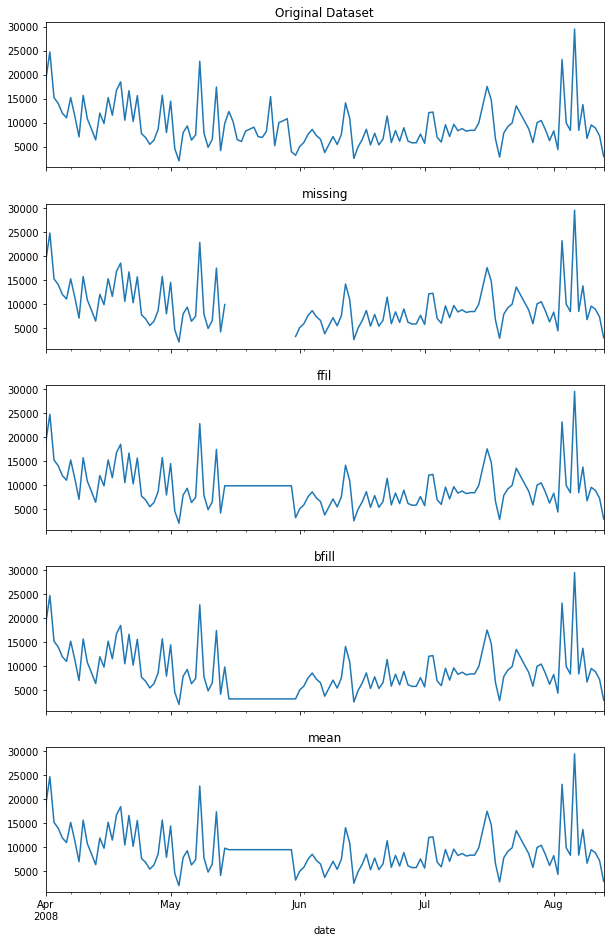

In [52]:
plot_dfs(clicks_original, clicks_missing, 'clicks')

In [53]:
clicks_missing.loc['2008-05-10':'2008-05-18']

,price,location,clicks,ffil,bfill,mean
date,,,,,,
2008-05-10,42.576299,1,4863.0,4863.0,4863.0,4863.000000
2008-05-11,43.405890,5,6511.0,6511.0,6511.0,6511.000000
2008-05-12,43.258326,2,17426.0,17426.0,17426.0,17426.000000
2008-05-13,42.714479,2,4160.0,4160.0,4160.0,4160.000000
2008-05-14,43.372786,5,9841.0,9841.0,9841.0,9841.000000
2008-05-15,42.517755,2,NaN,9841.0,3194.0,9530.336134
2008-05-16,44.011009,2,NaN,9841.0,3194.0,9530.336134
2008-05-17,42.530303,2,NaN,9841.0,3194.0,9530.336134
2008-05-18,42.565698,5,NaN,9841.0,3194.0,9530.336134


In [54]:
clicks_missing.loc['2008-05-30':'2008-06-15']

,price,location,clicks,ffil,bfill,mean
date,,,,,,
2008-05-30,44.558011,5,NaN,9841.0,3194.0,9530.336134
2008-05-31,43.100427,2,3194.0,3194.0,3194.0,3194.000000
2008-06-01,42.875000,2,5038.0,5038.0,5038.0,5038.000000
2008-06-02,43.406951,2,5879.0,5879.0,5879.0,5879.000000
2008-06-03,42.957505,5,7563.0,7563.0,7563.0,7563.000000
2008-06-04,42.930399,2,8584.0,8584.0,8584.0,8584.000000
2008-06-05,42.801887,2,7315.0,7315.0,7315.0,7315.000000
2008-06-06,43.740476,2,6541.0,6541.0,6541.0,6541.000000
2008-06-07,43.823729,1,3755.0,3755.0,3755.0,3755.000000


In [55]:
clicks_missing[clicks_missing['clicks'].isna()]

,price,location,clicks,ffil,bfill,mean
date,,,,,,
2008-05-15,42.517755,2,NaN,9841.0,3194.0,9530.336134
2008-05-16,44.011009,2,NaN,9841.0,3194.0,9530.336134
2008-05-17,42.530303,2,NaN,9841.0,3194.0,9530.336134
2008-05-18,42.565698,5,NaN,9841.0,3194.0,9530.336134
2008-05-19,43.892996,2,NaN,9841.0,3194.0,9530.336134
2008-05-20,43.247706,2,NaN,9841.0,3194.0,9530.336134
2008-05-21,44.106289,1,NaN,9841.0,3194.0,9530.336134
2008-05-22,43.810714,1,NaN,9841.0,3194.0,9530.336134
2008-05-23,43.620802,1,NaN,9841.0,3194.0,9530.336134


### There is More

In [56]:
co2_missing['co2'].ffill()
co2_missing['co2'].bfill()
clicks_missing['clicks'].ffill()
clicks_missing['clicks'].bfill()

date
2008-04-01    18784.0
2008-04-02    24738.0
2008-04-03    15209.0
2008-04-04    14018.0
2008-04-05    11974.0
               ...   
2008-08-09     6716.0
2008-08-10     9523.0
2008-08-11     8881.0
2008-08-12     7272.0
2008-08-13     2922.0
Name: clicks, Length: 135, dtype: float64

# Handling Missing Data with Univariate Imputation using Scikit-Learn

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from pathlib import Path

In [164]:
folder = Path('../../datasets/Ch7/')

co2_original = read_dataset(folder, 
                            'co2_original.csv', 'year')
co2_missing = read_dataset(folder, 
                           'co2_missing_only.csv', 'year')
clicks_original = read_dataset(folder, 
                               'clicks_original.csv', 'date')
clicks_missing = read_dataset(folder, 
                              'clicks_missing.csv', 'date')

In [165]:
strategy = [
    ('Mean Strategy', 'mean'),
    ('Median Strategy', 'median'),
    ('Most Frequent Strategy', 'most_frequent')]

In [166]:
co2_vals = co2_missing['co2'].values.reshape(-1,1)
clicks_vals = clicks_missing['clicks'].values.reshape(-1,1)

for s_name, s in strategy:
    co2_missing[s_name] = (
        SimpleImputer(strategy=s).fit_transform(co2_vals))
    clicks_missing[s_name] = (
        SimpleImputer(strategy=s).fit_transform(clicks_vals))

In [167]:
_ = rmse_score(co2_original, co2_missing, 'co2')

RMSE for Mean Strategy: 0.7156383637041684
RMSE for Median Strategy: 0.802942160685986
RMSE for Most Frequent Strategy: 1.1245663822743381


In [168]:
_ = rmse_score(clicks_original, clicks_missing, 'clicks')

RMSE for Mean Strategy: 997.7600138929953
RMSE for Median Strategy: 959.3580492530756
RMSE for Most Frequent Strategy: 1097.6425985146868


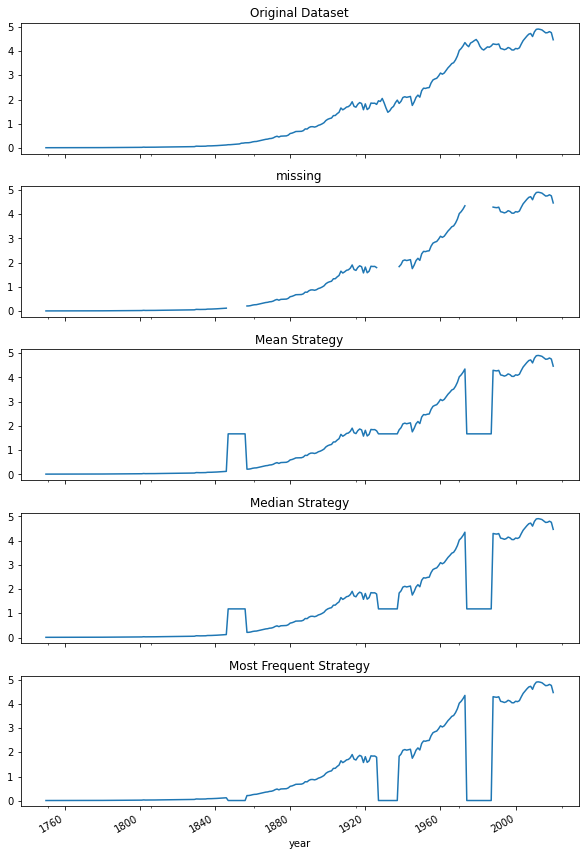

In [169]:
plot_dfs(co2_original, co2_missing, 'co2')

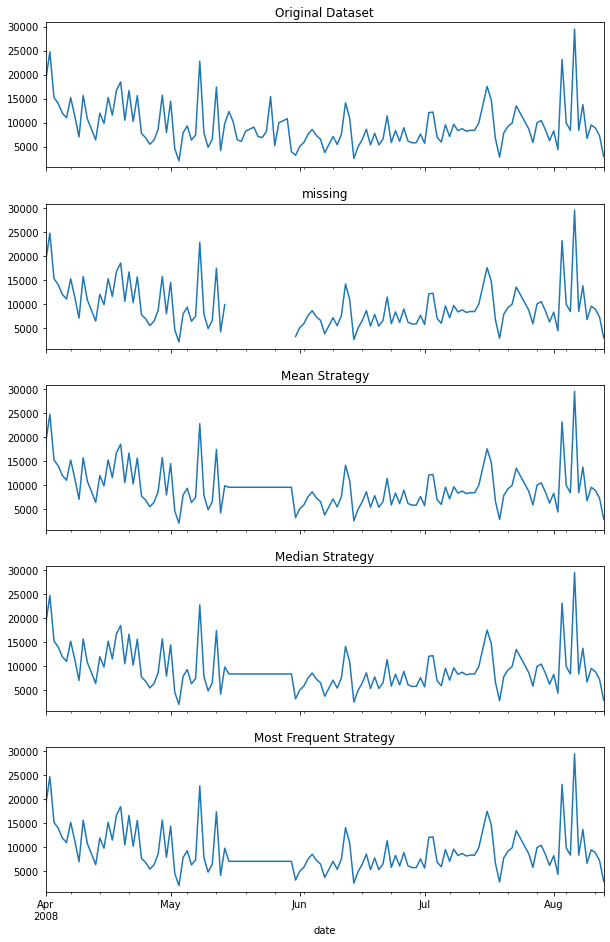

In [170]:
plot_dfs(clicks_original, clicks_missing, 'clicks')

## There is more

In [65]:
avg = co2_missing['co2'].mean()
co2_missing['pands_fillna'] = co2_missing['co2'].fillna(avg)

In [66]:
co2_missing

,co2,Mean Strategy,Median Strategy,Most Frequent Strategy,pands_fillna
year,,,,,
1750-01-01,0.0125,0.0125,0.0125,0.0125,0.0125
1760-01-01,0.0128,0.0128,0.0128,0.0128,0.0128
1770-01-01,0.0150,0.0150,0.0150,0.0150,0.0150
1780-01-01,0.0169,0.0169,0.0169,0.0169,0.0169
1790-01-01,0.0206,0.0206,0.0206,0.0206,0.0206
...,...,...,...,...,...
2016-01-01,4.7496,4.7496,4.7496,4.7496,4.7496
2017-01-01,4.7595,4.7595,4.7595,4.7595,4.7595
2018-01-01,4.8022,4.8022,4.8022,4.8022,4.8022


In [67]:
cols = ['co2', 'Mean Strategy', 'pands_fillna']
_ = rmse_score(co2_original, co2_missing[cols], 'co2')

RMSE for Mean Strategy: 0.7156383637041684
RMSE for pands_fillna: 0.7156383637041684


# Handling Missing Data with Multivariate Imputation

In [68]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor, BaggingRegressor
from sklearn.linear_model import ElasticNet, LinearRegression, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor

In [69]:
folder = Path('../../datasets/Ch7/')

clicks_original = read_dataset(folder, 
                            'clicks_original.csv', 'date')
clicks_missing = read_dataset(folder, 
                            'clicks_missing.csv', 'date')

In [70]:
clicks_missing.isna().sum()

price        0
location     0
clicks      16
dtype: int64

In [71]:
estimators = [
    ('bayesianRidge', BayesianRidge()),
    ('extra_trees', ExtraTreesRegressor(n_estimators=10)),
    ('bagging', BaggingRegressor(n_estimators=10)),
    ('elastic_net', ElasticNet()),
    ('linear_regression', LinearRegression()),
    ('knn', KNeighborsRegressor(n_neighbors=3))
]


In [72]:
clicks_vals = clicks_missing.iloc[:,0:3].values

for e_name, e in estimators:
    est = IterativeImputer(
                random_state=15,
                estimator=e).fit(clicks_vals)
    clicks_missing[e_name] = est.transform(clicks_vals)[: , 2]

    
    

/Users/tarekatwan/opt/anaconda3/envs/ts/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/tarekatwan/opt/anaconda3/envs/ts/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [75]:
_ = rmse_score(clicks_original, clicks_missing, 'clicks')

RMSE for bayesianRidge: 949.439397345585
RMSE for extra_trees: 1361.4256338281737
RMSE for bagging: 1138.517524776067
RMSE for elastic_net: 945.4075209343099
RMSE for linear_regression: 938.9419831427186
RMSE for knn: 1336.8798392251822


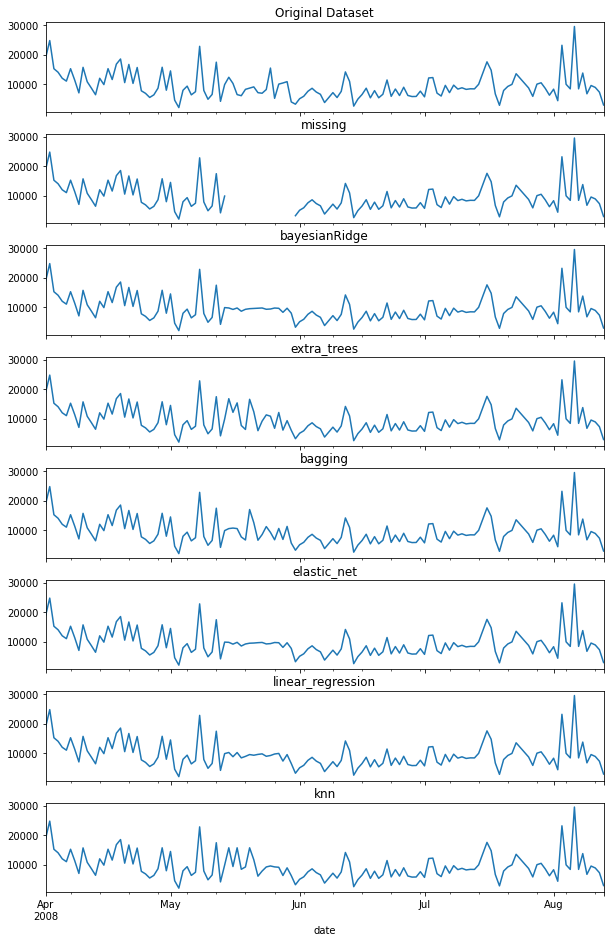

In [76]:

plot_dfs(clicks_original, clicks_missing, 'clicks')

### There is more

In [77]:
from statsmodels.imputation.mice import MICE, MICEData, MICEResults
import statsmodels.api as sm

In [78]:
# create a MICEData object
fltr = ['price', 'location','clicks']
mice_data = MICEData(clicks_missing[fltr], 
                     perturbation_method='gaussian')
# 20 iterations
mice_data.update_all(n_iter=20)

mice_data.set_imputer('clicks', formula='~ price + location', model_class=sm.OLS)

In [81]:
clicks_missing['MICE']  = mice_data.data['clicks'].values.tolist()

In [82]:
_ = rmse_score(clicks_original, clicks_missing, 'clicks')

RMSE for bayesianRidge: 949.439397345585
RMSE for extra_trees: 1361.4256338281737
RMSE for bagging: 1138.517524776067
RMSE for elastic_net: 945.4075209343099
RMSE for linear_regression: 938.9419831427186
RMSE for knn: 1336.8798392251822
RMSE for MICE: 1743.606929880105


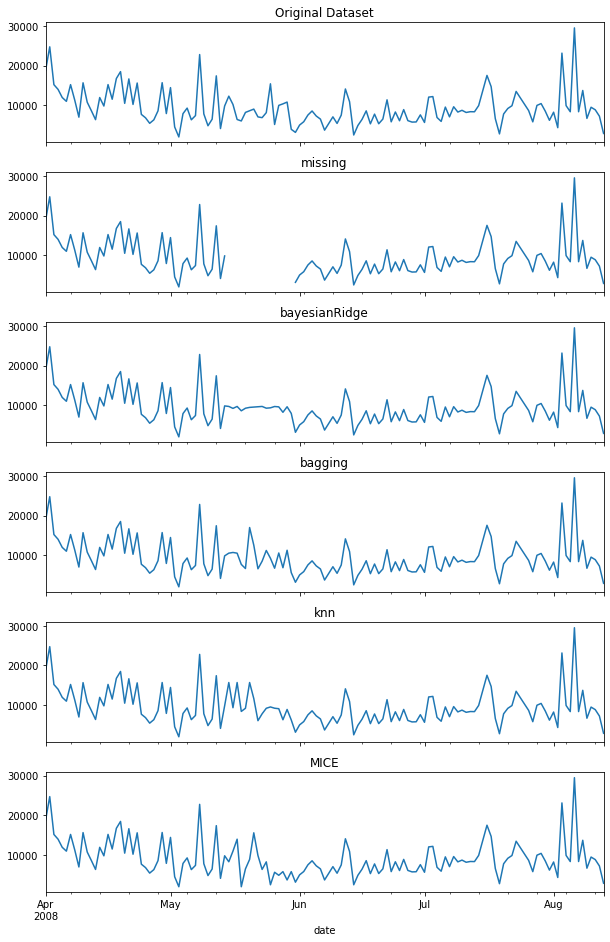

In [83]:
cols = ['clicks','bayesianRidge', 'bagging', 'knn', 'MICE']
plot_dfs(clicks_original, clicks_missing[cols], 'clicks')

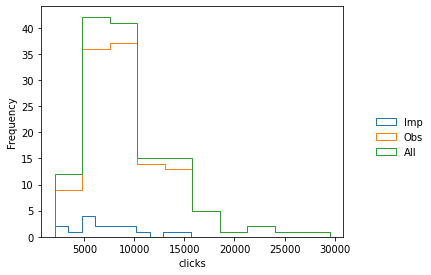

In [84]:
_ = mice_data.plot_imputed_hist('clicks')

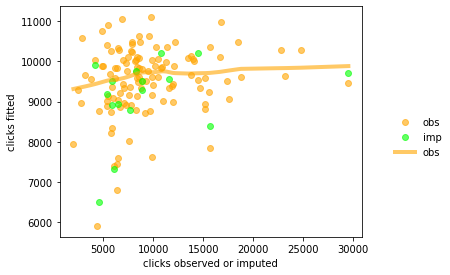

In [85]:
mice_data = MICEData(clicks_missing[fltr], 
                     perturbation_method='gaussian')
mice_data.update_all(n_iter=20)
_ = mice_data.plot_fit_obs('clicks')

# Handling Missing Data with Interpolation

In [7]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [27]:
folder = Path('../../datasets/Ch7/')

co2_original = read_dataset(folder, 
                            'co2_original.csv', 'year')
co2_missing = read_dataset(folder, 
                           'co2_missing_only.csv', 'year')
clicks_original = read_dataset(folder, 
                               'clicks_original.csv', 'date')
clicks_missing = read_dataset(folder, 
                              'clicks_missing.csv', 'date')

In [28]:
co2_missing.interpolate()

,co2
year,
1750-01-01,0.0125
1760-01-01,0.0128
1770-01-01,0.0150
1780-01-01,0.0169
1790-01-01,0.0206
...,...
2016-01-01,4.7496
2017-01-01,4.7595
2018-01-01,4.8022


In [29]:
interpolations = [
    'linear',
    'quadratic',
    'nearest',
    'cubic'
]

for intp in interpolations:
    co2_missing[intp] = co2_missing['co2'].interpolate(method=intp)
    clicks_missing[intp] = clicks_missing['clicks'].interpolate(method=intp)


co2_missing['spline'] = \
        co2_missing['co2'].interpolate(method='spline', order=3)
clicks_missing['spline'] = \
        clicks_missing['clicks'].interpolate(method='spline',order=3)

co2_missing['polynomial'] = \
        co2_missing['co2'].interpolate(method='polynomial',order=3)
clicks_missing['polynomial'] = \
        clicks_missing['clicks'].interpolate(method='polynomial',order=3)



In [30]:
_ = rmse_score(co2_original, co2_missing, 'co2')

RMSE for linear: 0.05507291327761665
RMSE for quadratic: 0.08367561505614346
RMSE for nearest: 0.05385422309469095
RMSE for cubic: 0.08373627305833138
RMSE for spline: 0.17765043760996152
RMSE for polynomial: 0.08373627305833138


In [31]:
_ = rmse_score(clicks_original, clicks_missing, 'clicks')

RMSE for linear: 1329.1448378562811
RMSE for quadratic: 5224.641260626974
RMSE for nearest: 1706.1853705030173
RMSE for cubic: 6199.304875782833
RMSE for spline: 6197.349119678481
RMSE for polynomial: 6199.304875782833


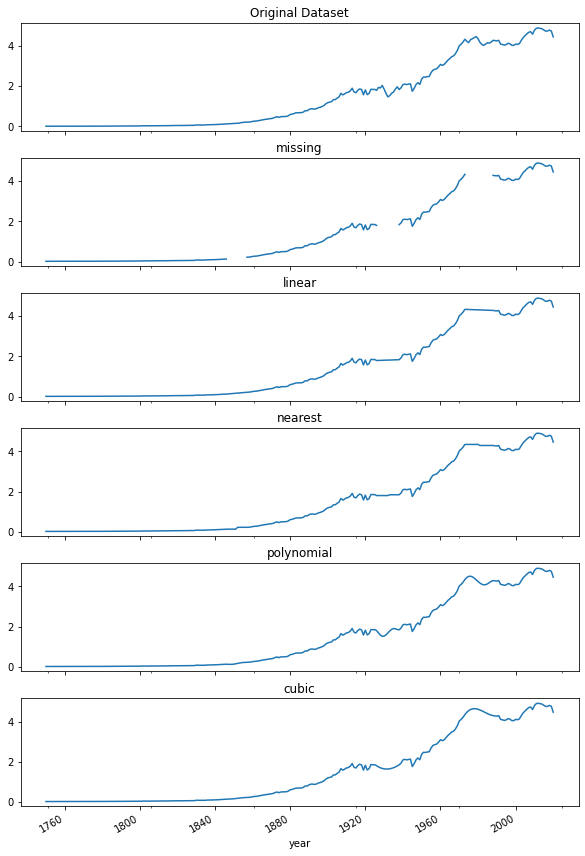

In [22]:
cols = ['co2', 'linear', 'nearest', 'polynomial', 'cubic']
plot_dfs(co2_original, co2_missing[cols], 'co2')

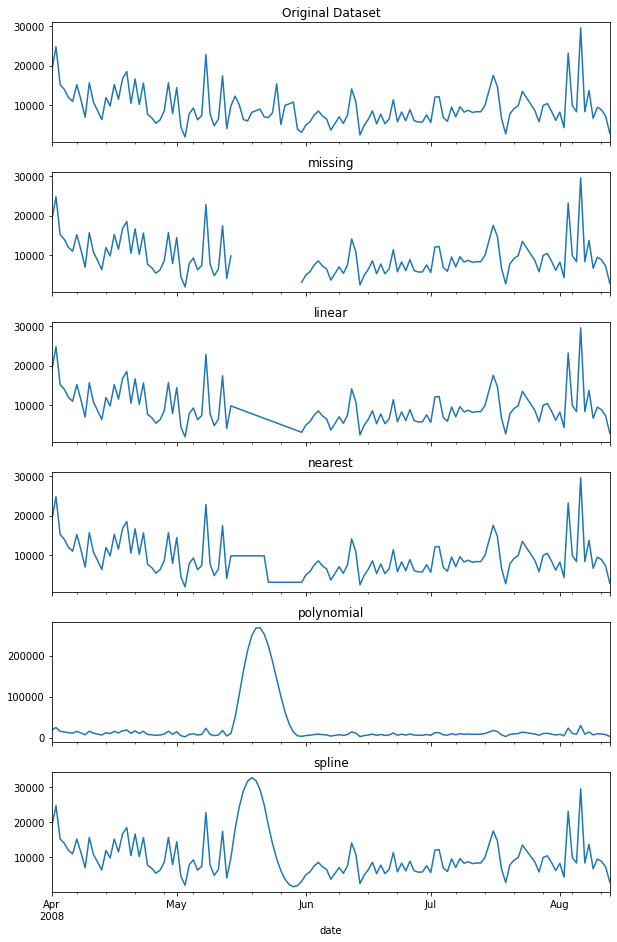

In [23]:
cols = ['clicks', 'linear', 'nearest', 'polynomial', 'spline']
plot_dfs(clicks_original, clicks_missing[cols], 'clicks')

### How it works

In [93]:
clicks_missing['clicks'].isna().sum()

16

In [94]:
example = clicks_missing['clicks'].interpolate(limit = 5)

In [95]:
example.isna().sum()

11

In [96]:
clicks_missing['clicks']['2008-05-14':]

date
2008-05-14    9841.0
2008-05-15       NaN
2008-05-16       NaN
2008-05-17       NaN
2008-05-18       NaN
               ...  
2008-08-09    6716.0
2008-08-10    9523.0
2008-08-11    8881.0
2008-08-12    7272.0
2008-08-13    2922.0
Name: clicks, Length: 92, dtype: float64

In [97]:
example['2008-05-14':]

date
2008-05-14    9841.0
2008-05-15    9450.0
2008-05-16    9059.0
2008-05-17    8668.0
2008-05-18    8277.0
               ...  
2008-08-09    6716.0
2008-08-10    9523.0
2008-08-11    8881.0
2008-08-12    7272.0
2008-08-13    2922.0
Name: clicks, Length: 92, dtype: float64

### There is more

In [98]:
clicks_original = read_dataset(folder, 
                               'clicks_original.csv', 'date')
clicks_missing = read_dataset(folder, 
                              'clicks_missing.csv', 'date')

In [99]:
clicks_missing.head()

,price,location,clicks
date,,,
2008-04-01,43.155647,2,18784.0
2008-04-02,43.079056,1,24738.0
2008-04-03,43.842609,2,15209.0
2008-04-04,43.312376,1,14018.0
2008-04-05,43.941176,1,11974.0


In [100]:
clicks_missing['clicks']['2008-05-14':]

date
2008-05-14    9841.0
2008-05-15       NaN
2008-05-16       NaN
2008-05-17       NaN
2008-05-18       NaN
               ...  
2008-08-09    6716.0
2008-08-10    9523.0
2008-08-11    8881.0
2008-08-12    7272.0
2008-08-13    2922.0
Name: clicks, Length: 92, dtype: float64

In [101]:
clicks_missing.shape

(135, 3)